In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/3diabetes.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.6148848684210526, 0.9615384615384616, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3324013157894737, 0.8846153846153846, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.19736842105263158, 0.8076923076923077, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.12631578947368421, 0.7307692307692307, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.11578947368421053, 0.6538461538461539, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10526315789473684, 0.5769230769230769, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.042105263157894736, 0.5, 'x[4] <= 156.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.021052631578947368, 0.4230769230769231, 'x[3] <= 41.0\ngini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.010526315789473684, 0.34615384615384615, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.03157894736842

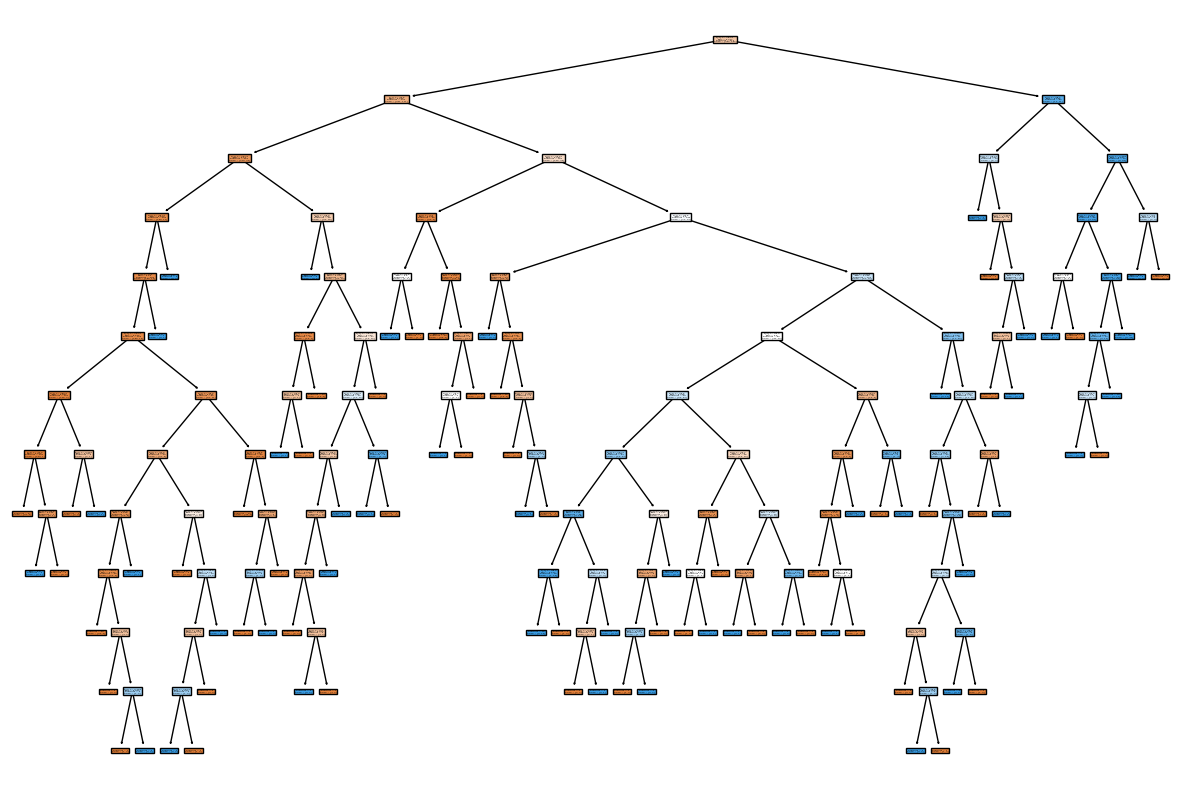

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 0.700787


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.74      0.79      0.77       158
           1       0.62      0.55      0.58        96

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=5)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

[Text(0.5213414634146342, 0.9166666666666666, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.2804878048780488, 0.75, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.12195121951219512, 0.5833333333333334, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.07317073170731707, 0.4166666666666667, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.04878048780487805, 0.25, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.024390243902439025, 0.08333333333333333, 'gini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.07317073170731707, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0975609756097561, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.17073170731707318, 0.4166666666666667, 'x[2] <= 55.0\ngini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.14634146341463414, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.19512

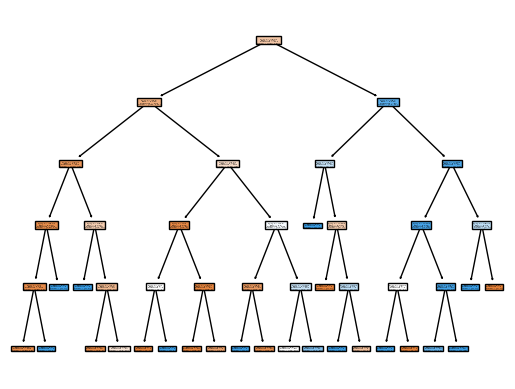

In [ ]:
tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.763780


# Post Pruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       184
           1       0.56      0.69      0.62        70

    accuracy                           0.76       254
   macro avg       0.71      0.74      0.72       254
weighted avg       0.78      0.76      0.77       254



In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.712598


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

           0       0.80      0.77      0.79       175
           1       0.53      0.58      0.56        79

    accuracy                           0.71       254
   macro avg       0.67      0.68      0.67       254
weighted avg       0.72      0.71      0.72       254



In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.00125887, 0.00172936, 0.00178658, 0.00181582,
       0.00182393, 0.00190916, 0.00194553, 0.00233463, 0.00233463,
       0.00235821, 0.00239449, 0.00249426, 0.00259403, 0.00259403,
       0.00262646, 0.00266815, 0.00291829, 0.00311284, 0.00311284,
       0.00316522, 0.00317769, 0.00319266, 0.00324254, 0.00324254,
       0.00331911, 0.00336939, 0.00338228, 0.00340467, 0.00345871,
       0.00375208, 0.00378297, 0.0038298 , 0.00405318, 0.00436579,
       0.00501436, 0.00554835, 0.00555097, 0.00570273, 0.00586462,
       0.00589553, 0.0084834 , 0.00994691, 0.01281388, 0.01321797,
       0.02321022, 0.03218384, 0.09942748])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.09942748374666904


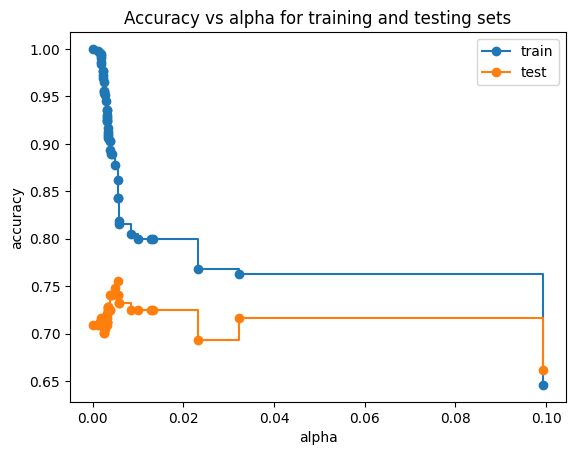

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.025)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.025, random_state=0)

[Text(0.6, 0.8333333333333334, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.4, 0.5, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.8, 0.5, 'gini = 0.232\nsamples = 82\nvalue = [11, 71]')]

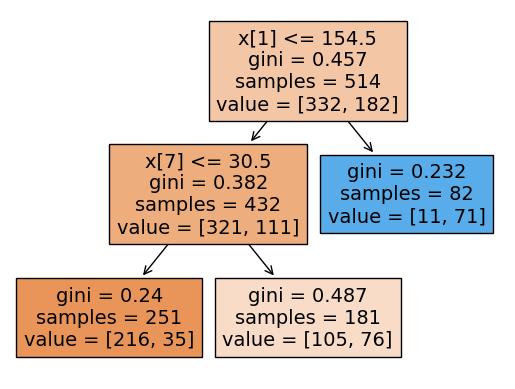

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.716535


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       214
           1       0.31      0.68      0.43        40

    accuracy                           0.72       254
   macro avg       0.62      0.70      0.62       254
weighted avg       0.83      0.72      0.75       254



# Proposed Algorithm 1

In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
print(df_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
464           10      115             98              0        0  24.0   
223            7      142             60             33      190  28.8   
393            4      116             72             12       87  22.1   
766            1      126             60              0        0  30.1   
570            3       78             70              0        0  32.5   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
464                     1.022   34        0  
223                

In [ ]:
numerical_features = df.columns[:-1].values
print(numerical_features)
binary_selection = change_to_class(numerical_features, 'Outcome')
print(binary_selection)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
{'Pregnancies': 6, 'Glucose': 154, 'BloodPressure': 68, 'SkinThickness': 30, 'Insulin': 142, 'BMI': 28.8, 'DiabetesPedigreeFunction': 0.501, 'Age': 30}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)
        DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
        Y_Sub = X_sub[feature][0].iloc[:,-1:]
        X_temp = X_sub[feature][0].iloc[:,:-1]
        DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
        Y_Sub = X_sub[feature][1].iloc[:,-1:]
        X_temp = X_sub[feature][1].iloc[:,:-1]
        DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = row[1][feature] >= binary_selection[feature]
        if label not in list(X_sub[feature].keys()):
          prediction.append(0)
          continue;
        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
    #     prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 4)
proposed_algo_1_dt.fit(df_train)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(X_test.shape)
print(y_pred_proposed_algo_1)

(254, 8)
[[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(y_test_proposed_algo_1)
  recall = recall_score(feature_pred, y_test, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

0.7507906388361796


In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test):.6f}')

accuracy: 0.771654


In [ ]:
print(classification_report(proposed_algo_result, y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       186
           1       0.56      0.71      0.62        68

    accuracy                           0.77       254
   macro avg       0.72      0.75      0.73       254
weighted avg       0.79      0.77      0.78       254

